In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re

# tf-idf to check keywords
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/keen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

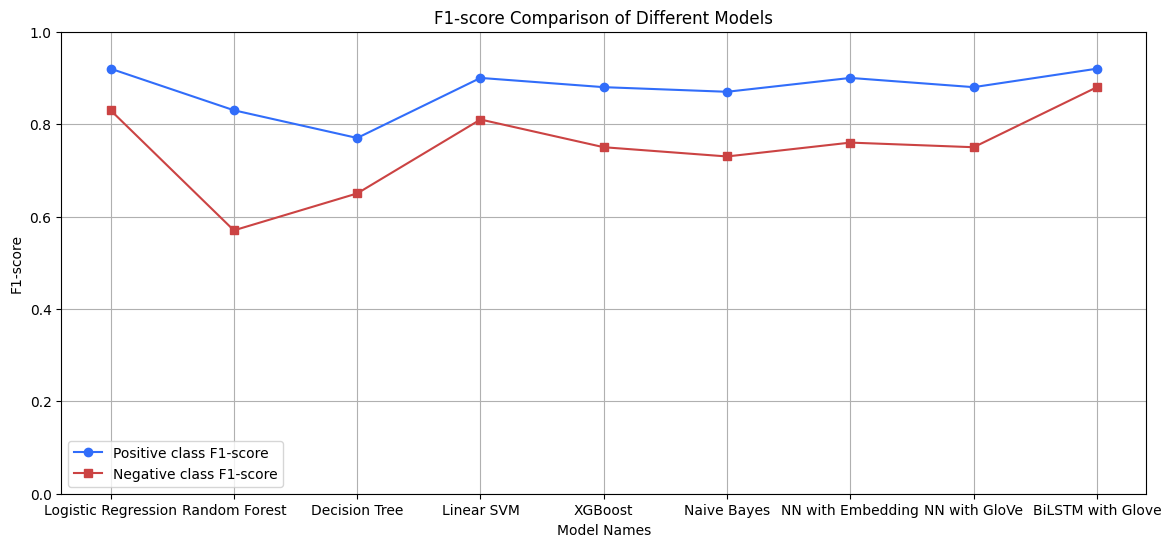

In [2]:
# data from the report, using auto tuning
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Linear SVM', 'XGBoost', 'Naive Bayes', 'NN with Embedding', 'NN with GloVe', 'BiLSTM with Glove']

# relevant, label = 1, F1-score
f1_positive = [0.92, 0.83, 0.77, 0.90, 0.88, 0.87, 0.90, 0.88, 0.92]

# not relevant, label = 0, F1-score
f1_negative = [0.83, 0.57, 0.65, 0.81, 0.75, 0.73, 0.76, 0.75, 0.88]

plt.figure(figsize=(14, 6))
plt.plot(models, f1_positive, marker='o', label='Positive class F1-score', color="#316DFA")
plt.plot(models, f1_negative, marker='s', label='Negative class F1-score', color="#cb4343")

plt.xticks(models)
plt.xlabel('Model Names')
plt.ylabel('F1-score')
plt.title('F1-score Comparison of Different Models')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

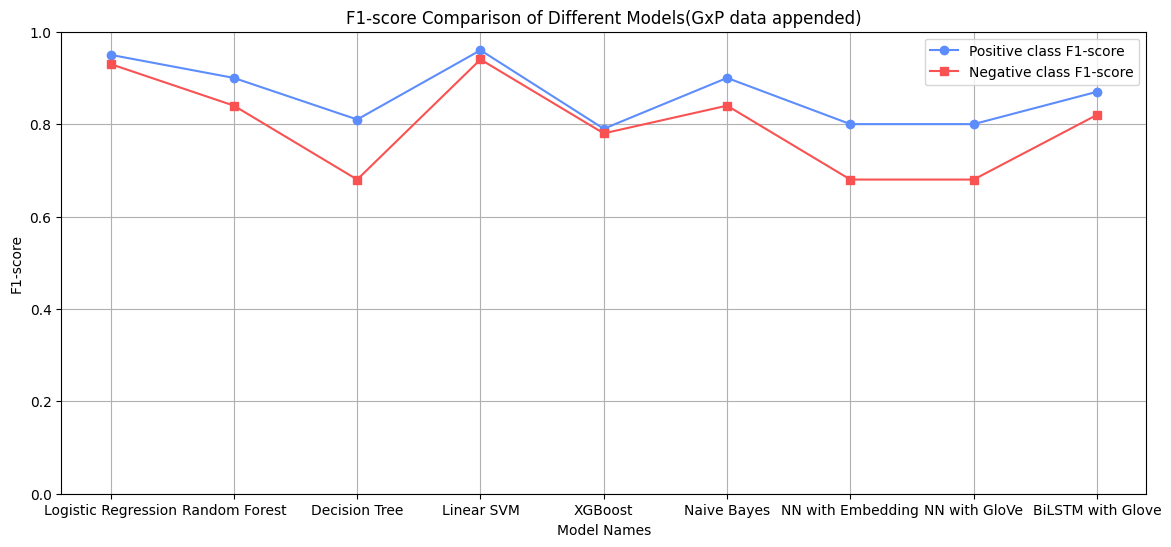

In [3]:
# data from the report, using auto tuning, adding GxP data
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Linear SVM', 'XGBoost', 'Naive Bayes', 'NN with Embedding', 'NN with GloVe', 'BiLSTM with Glove']

# relevant, label = 1, F1-score
f1_positive = [0.95, 0.90, 0.81, 0.96, 0.79, 0.90, 0.80, 0.80, 0.87]

# not relevant, label = 0, F1-score
f1_negative = [0.93, 0.84, 0.68, 0.94, 0.78, 0.84, 0.68, 0.68, 0.82]

plt.figure(figsize=(14, 6))
plt.plot(models, f1_positive, marker='o', label='Positive class F1-score', color="#5D8DFC")
plt.plot(models, f1_negative, marker='s', label='Negative class F1-score', color="#f95252")

plt.xticks(models)
plt.xlabel('Model Names')
plt.ylabel('F1-score')
plt.title('F1-score Comparison of Different Models(GxP data appended)')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

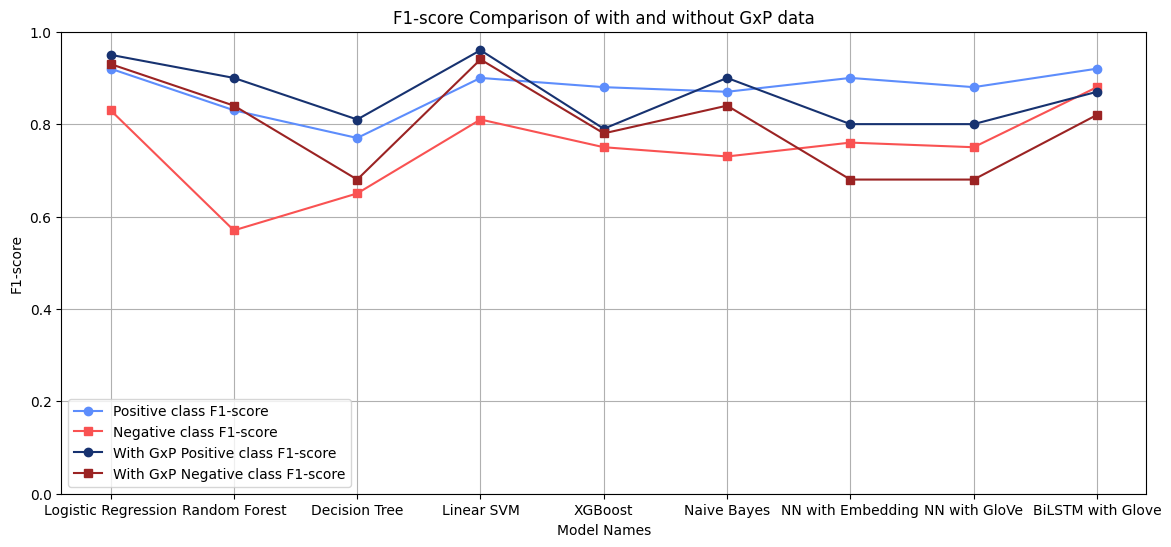

In [4]:
# data from the report, using auto tuning
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Linear SVM', 'XGBoost', 'Naive Bayes', 'NN with Embedding', 'NN with GloVe', 'BiLSTM with Glove']

# relevant, label = 1, F1-score
f1_positive = [0.92, 0.83, 0.77, 0.90, 0.88, 0.87, 0.90, 0.88, 0.92]

# not relevant, label = 0, F1-score
f1_negative = [0.83, 0.57, 0.65, 0.81, 0.75, 0.73, 0.76, 0.75, 0.88]

plt.figure(figsize=(14, 6))
plt.plot(models, f1_positive, marker='o', label='Positive class F1-score', color="#5D8DFC")
plt.plot(models, f1_negative, marker='s', label='Negative class F1-score', color="#f95252")


# relevant, label = 1, F1-score
f1_positive_GxP = [0.95, 0.90, 0.81, 0.96, 0.79, 0.90, 0.80, 0.80, 0.87]

# not relevant, label = 0, F1-score
f1_negative_GxP = [0.93, 0.84, 0.68, 0.94, 0.78, 0.84, 0.68, 0.68, 0.82]
plt.plot(models, f1_positive_GxP, marker='o', label='With GxP Positive class F1-score', color="#173270")
plt.plot(models, f1_negative_GxP, marker='s', label='With GxP Negative class F1-score', color="#9B2323")

plt.xticks(models)
plt.xlabel('Model Names')
plt.ylabel('F1-score')
plt.title('F1-score Comparison of with and without GxP data')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

In [5]:
def plot_relevance(count_data, 
                    colors=["#316DFA", "#cb4343"], 
                    xlabel='Keyword', 
                    ylabel='Count', 
                    legend_labels=['Relevant (1)', 'Non-relevant (0)'], 
                    title='Count of Relevant (1) and Non-relevant (0) Entries by Keyword'):
    """
    Plot stacked bar chart for counts of relevant (1) and non-relevant (0) entries by keyword.

    Parameters:
    1, count_data: pandas DataFrame with keywords as index, and two columns [1, 0] for label counts.
    2, colors: list of two color hex codes, first for relevant (1), second for non-relevant (0).
    3, xlabel: label for x-axis.
    4, ylabel: label for y-axis.
    5, legend_labels: list of two strings for legend entries.
    6, title: plot title string.
    """
    plt.figure(figsize=(12, 6))
    count_data.plot(kind='bar', stacked=True, color=colors)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(legend_labels)
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

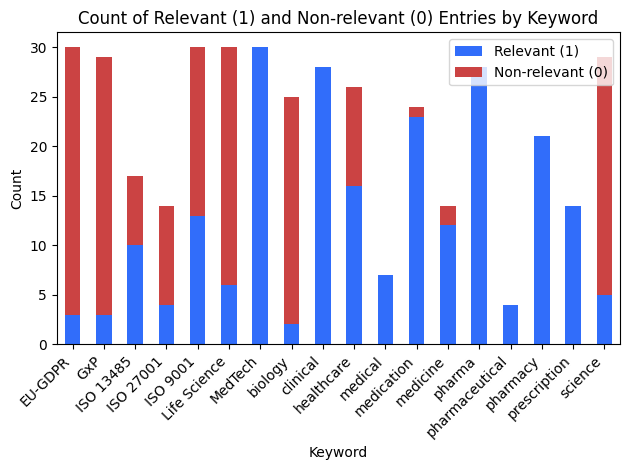

<Figure size 1200x600 with 0 Axes>

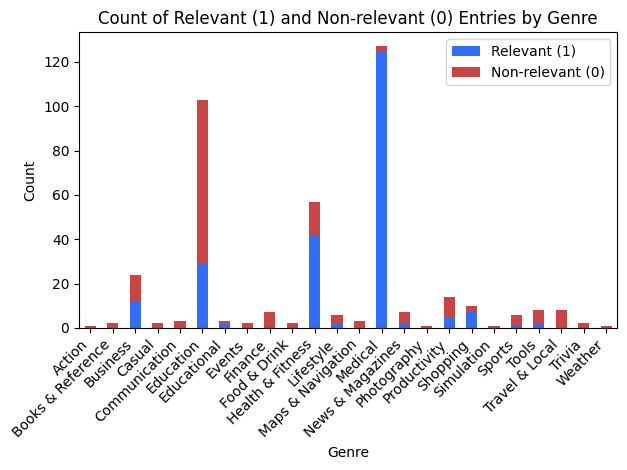

In [6]:
# read annotated data from csv file
with open('annotated__google.csv', encoding='utf-8', errors='ignore') as f:
    data = pd.read_csv(f)   
# print(data.head())

# preprocess the text: 
def clean_text(text):
    if not isinstance(text, str):  # check if it's string
        return ''
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # remove special symbol other than letter or number
    return text

data['clean_description'] = data['description'].apply(clean_text)
data = data.dropna(subset=['label', 'keyword','genre','clean_description']) #remove empty terms

# cnt for keyword and label
count_data = data.groupby(['keyword', 'label']).size().unstack(fill_value=0)
count_data = count_data[[1, 0]] 

plot_relevance(count_data, 
                    xlabel='Keyword', 
                    ylabel='Count', 
                    legend_labels=['Relevant (1)', 'Non-relevant (0)'], 
                    title='Count of Relevant (1) and Non-relevant (0) Entries by Keyword')


count_data_genre = data.groupby(['genre', 'label']).size().unstack(fill_value=0)
count_data_genre = count_data_genre[[1, 0]] 
# check the genre 
plot_relevance(count_data_genre, 
                    xlabel='Genre', 
                    ylabel='Count', 
                    legend_labels=['Relevant (1)', 'Non-relevant (0)'], 
                    title='Count of Relevant (1) and Non-relevant (0) Entries by Genre')

In [7]:
#filter version:

def plot_relevance_filtered(count_data, 
                              colors=["#5E864A", "#edb846"], 
                              xlabel='Keyword', 
                              ylabel='Count', 
                              legend_labels=['Relevant (1)', 'Non-relevant (0)'], 
                              title='Count of Relevant (1) and Non-relevant (0) Entries by Keyword'):
    """
    Plot stacked bar chart for counts of relevant (1) and non-relevant (0) entries by keyword.
    Filters out keywords with zero relevant (1) counts.

    Parameters:
    - count_data: pandas DataFrame with keywords as index, and two columns [1, 0] for label counts.
    - colors: list of two color hex codes, first for relevant (1), second for non-relevant (0).
    - xlabel: label for x-axis.
    - ylabel: label for y-axis.
    - legend_labels: list of two strings for legend entries.
    - title: plot title string.
    """
    # Filter out keywords with 0 relevant counts
    filtered_data = count_data[count_data[1] > 0]

    if filtered_data.empty:
        print("No keywords with relevant label counts > 0 found.")
        return
    
    plt.figure(figsize=(12, 6))
    filtered_data.plot(kind='bar', stacked=True, color=colors)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(legend_labels)
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

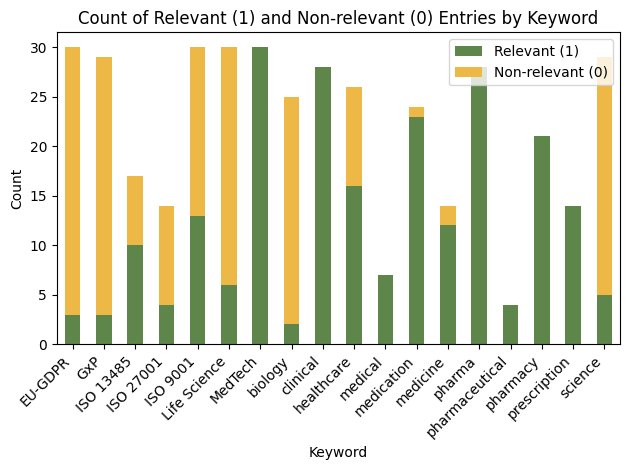

<Figure size 1200x600 with 0 Axes>

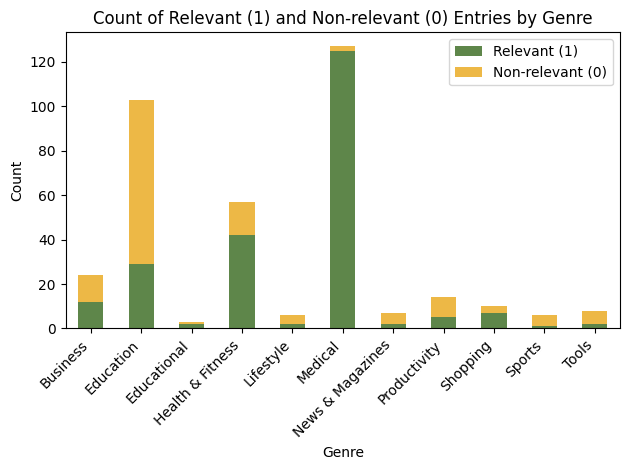

In [8]:
plot_relevance_filtered(count_data, 
                    xlabel='Keyword', 
                    ylabel='Count', 
                    legend_labels=['Relevant (1)', 'Non-relevant (0)'], 
                    title='Count of Relevant (1) and Non-relevant (0) Entries by Keyword')


count_data_genre = data.groupby(['genre', 'label']).size().unstack(fill_value=0)
count_data_genre = count_data_genre[[1, 0]] 
# check the genre 
plot_relevance_filtered(count_data_genre, 
                    xlabel='Genre', 
                    ylabel='Count', 
                    legend_labels=['Relevant (1)', 'Non-relevant (0)'], 
                    title='Count of Relevant (1) and Non-relevant (0) Entries by Genre')

In [9]:
# check pattern using good/bad keywords:
# modify stopwords:
custom_stopwords = list(ENGLISH_STOP_WORDS.union({'app', 'result', 'method'}))
def get_top_tfidf_features_for_keyword(data, keyword, top_n=20):
    """
    For a given keyword, compute top TF-IDF features for positive and negative labels separately.

    Parameters:
    1, data: pandas DataFrame with 'clean_description', 'label', and 'keyword' columns
    2, keyword: the keyword to filter rows by
    3, top_n: number of top features to extract

    Returns:
    1, Two pandas Series: top tf-idf terms for label=1 and label=0
    """
    # Filter data for this keyword
    subset = data[data['keyword'] == keyword]

    # Split by label
    pos_data = subset[subset['label'] == 1]['clean_description']
    neg_data = subset[subset['label'] == 0]['clean_description']

    if len(pos_data) == 0 or len(neg_data) == 0:
        print(f"⚠️ Not enough data for keyword: {keyword}")
        return None, None

    # Fit vectorizer separately for each label group
    vectorizer = TfidfVectorizer(max_features=1000,stop_words=custom_stopwords)
    X_pos = vectorizer.fit_transform(pos_data)
    feature_names_pos = vectorizer.get_feature_names_out()
    avg_tfidf_pos = np.asarray(X_pos.mean(axis=0)).flatten()
    top_pos_idx = avg_tfidf_pos.argsort()[::-1][:top_n]
    top_pos_features = pd.Series(avg_tfidf_pos[top_pos_idx], index=feature_names_pos[top_pos_idx])

    vectorizer = TfidfVectorizer(max_features=1000,stop_words=custom_stopwords)
    X_neg = vectorizer.fit_transform(neg_data)
    feature_names_neg = vectorizer.get_feature_names_out()
    avg_tfidf_neg = np.asarray(X_neg.mean(axis=0)).flatten()
    top_neg_idx = avg_tfidf_neg.argsort()[::-1][:top_n]
    top_neg_features = pd.Series(avg_tfidf_neg[top_neg_idx], index=feature_names_neg[top_neg_idx])

    return top_pos_features, top_neg_features


In [10]:
def plot_top_tfidf_features_for_keyword(data, keyword, top_n=20):
    """
    Plot the top TF-IDF features for label=1 and label=0 entries of a given keyword.

    Parameters:
    1, data: pandas DataFrame with 'clean_description', 'label', and 'keyword' columns
    2, keyword: the keyword to filter by
    3, top_n: number of top features to visualize
    """
    # extract TF-IDF feature
    top_pos, top_neg = get_top_tfidf_features_for_keyword(data, keyword, top_n=top_n)

    if top_pos is None or top_neg is None:
        return  # skip if not exist

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Top {top_n} TF-IDF Features for Keyword: '{keyword}'", fontsize=16)

    # （label = 1）
    axs[0].barh(top_pos.index[::-1], top_pos.values[::-1], color='steelblue')
    axs[0].set_title("Relevant (Label=1)")
    axs[0].set_xlabel("TF-IDF Score")
    axs[0].set_ylabel("Feature")

    # （label = 0）
    axs[1].barh(top_neg.index[::-1], top_neg.values[::-1], color='indianred')
    axs[1].set_title("Irrelevant (Label=0)")
    axs[1].set_xlabel("TF-IDF Score")
    axs[1].set_ylabel("Feature")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


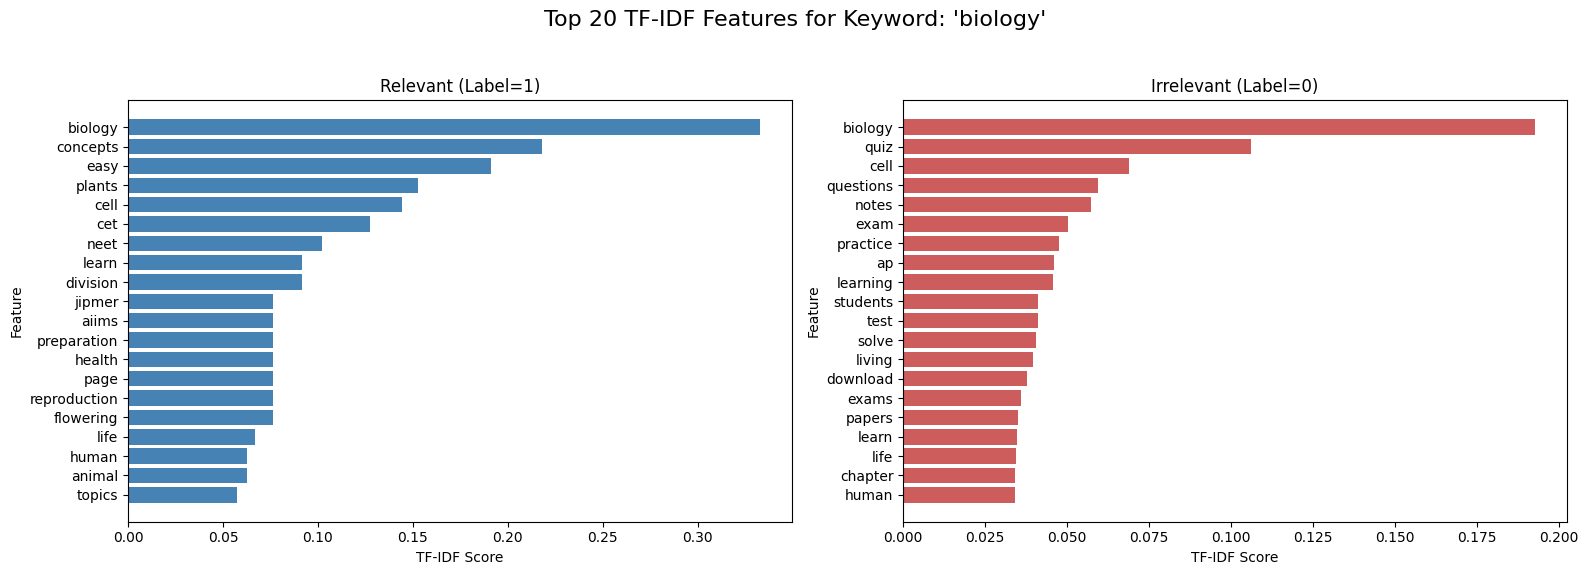

In [11]:
plot_top_tfidf_features_for_keyword(data, "biology")

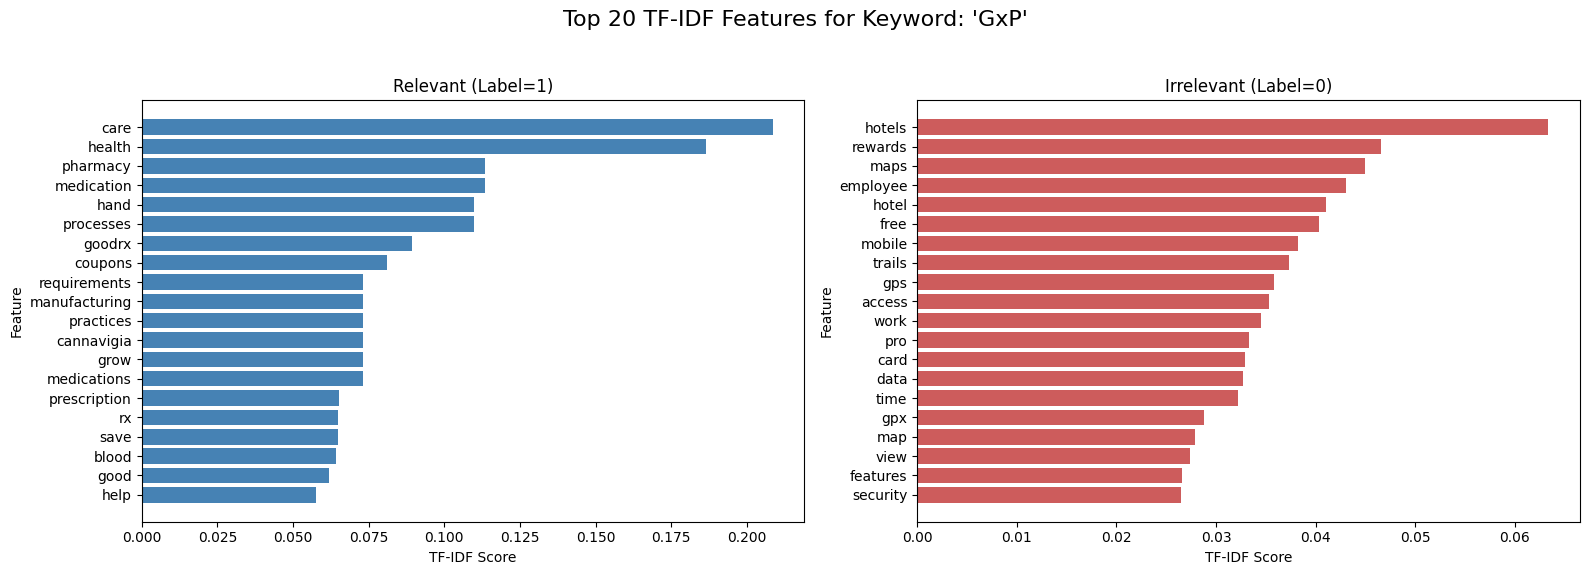

In [12]:
plot_top_tfidf_features_for_keyword(data, "GxP")

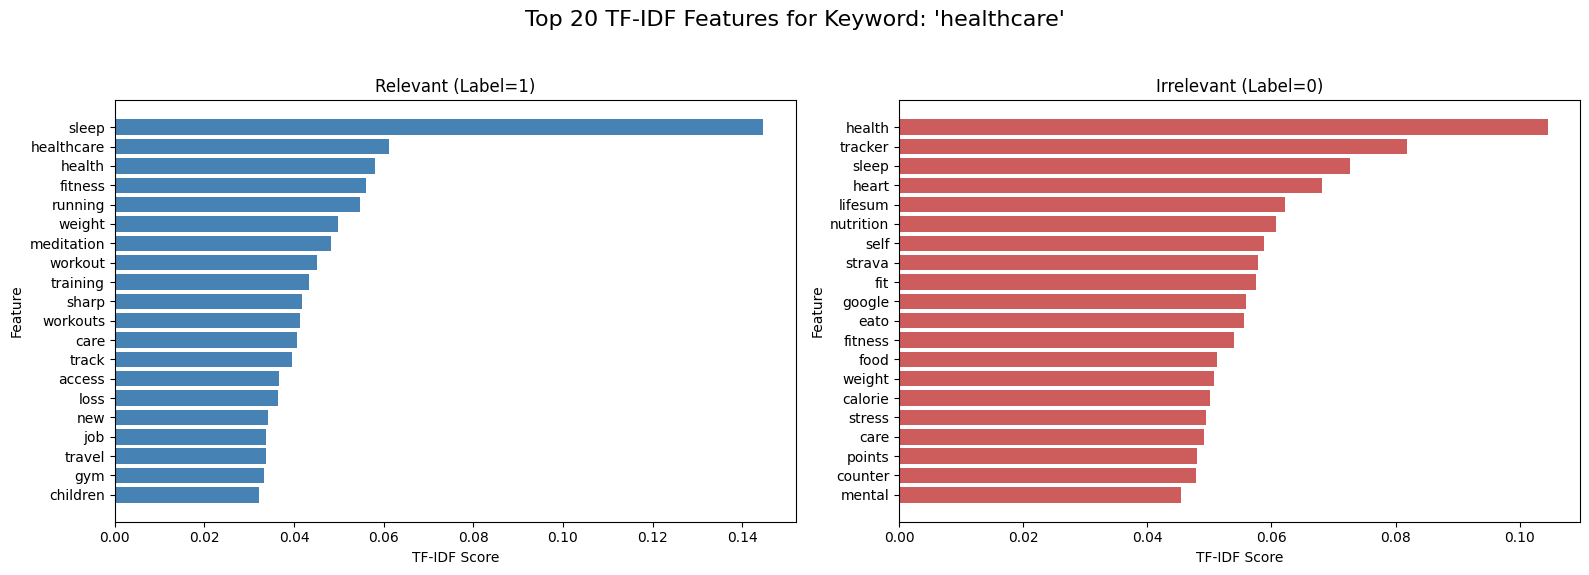

In [13]:
plot_top_tfidf_features_for_keyword(data, "healthcare")

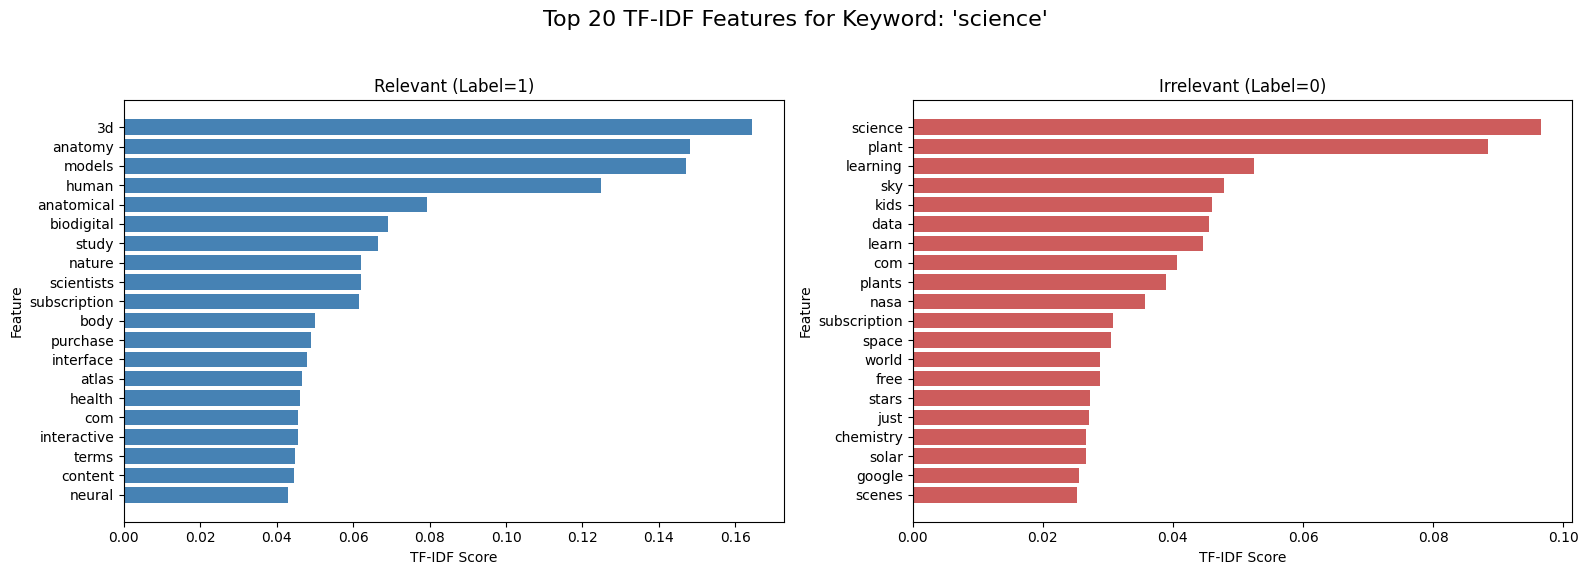

In [14]:
plot_top_tfidf_features_for_keyword(data, "science")

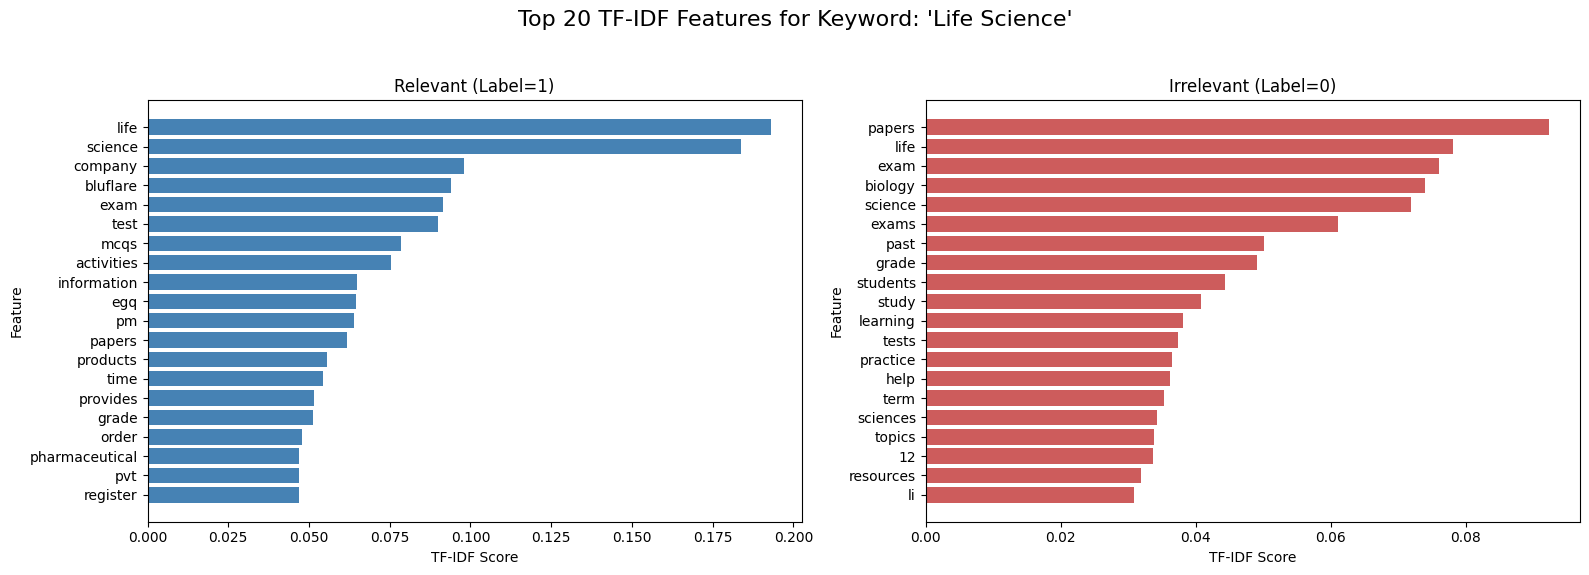

In [15]:
plot_top_tfidf_features_for_keyword(data, "Life Science")

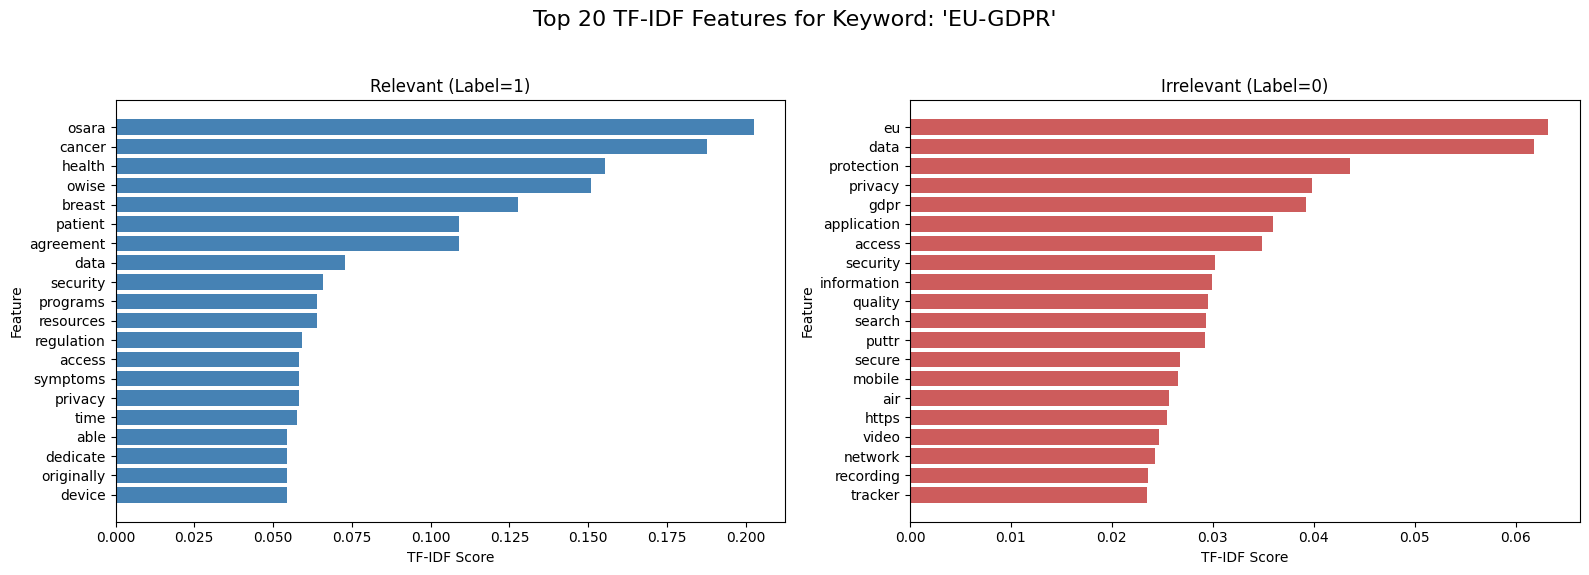

In [16]:
plot_top_tfidf_features_for_keyword(data, "EU-GDPR")